In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
df=pd.read_csv('TFG_OFICIAL.csv')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17919 entries, 0 to 17918
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case_number                     17919 non-null  object 
 1   District_code                   17919 non-null  int64  
 2   District_name                   17919 non-null  object 
 3   Neighborhood_code               17919 non-null  int64  
 4   Neighborhood_name               17919 non-null  object 
 5   Street_code                     17919 non-null  int64  
 6   Street_name                     17919 non-null  object 
 7   Postal_number                   17919 non-null  object 
 8   Week_day                        17919 non-null  object 
 9   Year                            17919 non-null  int64  
 10  Month                           17919 non-null  int64  
 11  Month_name                      17919 non-null  object 
 12  Day_month                       

In [4]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Injury_severity': ['Slight', 'Hospitalized', 'Dead', 'Slight Assistance', 'Severe']
}


# Crear las nuevas columnas y asignarles inicialmente valores de 0
df['Severe'] = 0
df['Slight'] = 0
df['Dead'] = 0

# Actualizar los valores en las nuevas columnas según los valores en 'Injury_severity'
df.loc[df['Injury_severity'].isin(['Hospitalized', 'Severe']), 'Severe'] = 1
df.loc[df['Injury_severity'].isin(['Slight', 'Slight Assistance']), 'Slight'] = 1
df.loc[df['Injury_severity'] == 'Dead', 'Dead'] = 1

print(df)


           Case_number  District_code        District_name  Neighborhood_code  \
0      2021S000001                  4            Les Corts                 21   
1      2021S000001                  4            Les Corts                 21   
2      2021S000002                  2             Eixample                  8   
3      2021S000002                  2             Eixample                  8   
4      2021S000002                  2             Eixample                  8   
...                ...            ...                  ...                ...   
17914  2022S008011                  8           Nou Barris                 48   
17915  2022S008007                  8           Nou Barris                 44   
17916  2022S008007                  8           Nou Barris                 44   
17917  2022S008009                  5  Sarrià-Sant Gervasi                 26   
17918  2022S008009                  5  Sarrià-Sant Gervasi                 26   

                     Neighb

In [5]:
df

,Case_number,District_code,District_name,Neighborhood_code,Neighborhood_name,Street_code,Street_name,Postal_number,Week_day,Year,...,Density,TM,HRM,PM,PPT,RS24h,VVM10,Severe,Slight,Dead
0,2021S000001,4,Les Corts,21,Pedralbes,52707,Cavallers,0038A0038A,Friday,2021,...,1,8.9,61,1001.0,0.1,1.5,1.9,1,0,0
1,2021S000001,4,Les Corts,21,Pedralbes,52707,Cavallers,0038A0038A,Friday,2021,...,1,8.9,61,1001.0,0.1,1.5,1.9,1,0,0
2,2021S000002,2,Eixample,8,l'Antiga Esquerra de l'Eixample,18505,Aragó,0218 0218,Friday,2021,...,1,8.9,61,1001.0,0.1,1.5,1.9,0,1,0
3,2021S000002,2,Eixample,8,l'Antiga Esquerra de l'Eixample,18505,Aragó,0218 0218,Friday,2021,...,1,8.9,61,1001.0,0.1,1.5,1.9,0,1,0
4,2021S000002,2,Eixample,8,l'Antiga Esquerra de l'Eixample,18505,Aragó,0218 0218,Friday,2021,...,1,8.9,61,1001.0,0.1,1.5,1.9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,8,Nou Barris,48,la Guineueta,75101,Caçador,0004X0004X,Saturday,2022,...,1,17.2,57,1020.7,0.0,8.7,1.9,0,1,0
17915,2022S008007,8,Nou Barris,44,Vilapicina i la Torre Llobeta,119003,Fabra i Puig,0181 0181,Saturday,2022,...,1,17.2,57,1020.7,0.0,8.7,1.9,1,0,0
17916,2022S008007,8,Nou Barris,44,Vilapicina i la Torre Llobeta,119003,Fabra i Puig,0181 0181,Saturday,2022,...,1,17.2,57,1020.7,0.0,8.7,1.9,1,0,0
17917,2022S008009,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,28000,Augusta,0248 0250,Saturday,2022,...,1,17.2,57,1020.7,0.0,8.7,1.9,1,0,0


In [6]:
import datetime

def is_holiday(day, day_of_week):
    # Create a dictionary of holiday dates
    holidays = {
        '01/01/2021': 'New Year',
        '06/01/2021': 'Epiphany',
        '02/04/2021': 'Divendres Sant',
        '05/04/2021': 'Pascua',
        '01/05/2021': 'Mayo',
        '24/05/2021': 'Sant Joan1',
        '24/06/2021': 'Sant Joan',
        '11/09/2021': 'Asumpcio',
        '24/09/2021': 'Merce',
        '12/10/2021': 'Hispanidad',
        '01/11/2021': 'Tots sants',
        '06/12/2021': 'Constitucio',
        '08/12/2021': 'Constitucio2',
        '25/12/2021': 'St Esteve',
        '01/01/2022': 'New Year',
        '06/01/2022': 'Epiphany',
        '15/04/2022': 'Divendres Sant',
        '18/04/2022': 'Pascua',
        '06/06/2022': 'Pascua 2',
        '24/06/2022': 'Sant Joan',
        '15/08/2022': 'Asumpcio',
        '24/09/2022': 'Merce',
        '26/09/2022': 'Merce2',
        '12/10/2022': 'Hispanidad',
        '01/11/2022': 'Tots sants',
        '06/12/2022': 'Constitucio',
        '08/12/2022': 'Constitucio2',
        '26/12/2022': 'St Esteve',
    }
    # Check if the day is a holiday or weekend
    if day in holidays or day_of_week in ['Saturday', 'Sunday']:
        return 'Yes'
    else:
        return 'No'

# Assuming 'Dia' contains the date and 'Day' contains the day of the week
df['Holiday'] = df.apply(lambda row: is_holiday(row['Day'], row['Week_day']), axis=1)

In [7]:
import datetime

def is_holiday(day, day_of_week):
    # Create a dictionary of holiday dates
    holidays = {
        '05/04/2021': 'New Year',
        '24/05/2021': 'Epiphany',
        '12/10/2021': 'Divendres Sant',
        '01/11/2021': 'Pascua',
        '8/12/2021': 'Mayo',
        '18/04/2022': 'Sant Joan1',
        '06/06/2022': 'Sant Joan',
        '15/08/2022': 'Asumpcio',
        '01/11/2022': 'Merce',
        '06/12/2022': 'Hispanidad',
        '26/12/2022': 'Hispanidad'
      
    }
    # Check if the day is a holiday or weekend
    if day in holidays or day_of_week in ['Sunday']:
        return 'Yes'
    else:
        return 'No'

# Assuming 'Dia' contains the date and 'Day' contains the day of the week
df['Weekend Return'] = df.apply(lambda row: is_holiday(row['Day'], row['Week_day']), axis=1)

In [8]:
df.rename(columns={'Weekend Exists': 'Weekend Exit'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17919 entries, 0 to 17918
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case_number                     17919 non-null  object 
 1   District_code                   17919 non-null  int64  
 2   District_name                   17919 non-null  object 
 3   Neighborhood_code               17919 non-null  int64  
 4   Neighborhood_name               17919 non-null  object 
 5   Street_code                     17919 non-null  int64  
 6   Street_name                     17919 non-null  object 
 7   Postal_number                   17919 non-null  object 
 8   Week_day                        17919 non-null  object 
 9   Year                            17919 non-null  int64  
 10  Month                           17919 non-null  int64  
 11  Month_name                      17919 non-null  object 
 12  Day_month                       

In [10]:
#df.drop(columns=['Injury_severity'], inplace=True)
df.drop(['District_code'], axis=1, inplace=True)
df.drop(['Neighborhood_code'], axis=1, inplace=True)
df.drop(['Postal_number'], axis=1, inplace=True)
df.drop(['Street_name'], axis=1, inplace=True)
df.drop(['Street_code'], axis=1, inplace=True)

df.drop(['Pedestrian_collision_place'], axis=1, inplace=True)
df.drop(['Person_type'], axis=1, inplace=True)
df.drop(['Number of victims'], axis=1, inplace=True)
df.drop(['Slightly injured'], axis=1, inplace=True)
df.drop(['Severely injured'], axis=1, inplace=True)
df.drop(['Numero_expedient_count'], axis=1, inplace=True)
df.drop(['Coordinate_UTM_X_ED50 '], axis=1)
df.drop(['Coordinate_UTM_Y_ED50'], axis=1)
df.drop(['Longitude'], axis=1, inplace=True)
df.drop(['Latitude'], axis=1, inplace=True)
df.drop(['Pedestrian_displacement_motive'], axis=1, inplace=True)
df.drop(['Month_name'], axis=1, inplace=True)
df.drop(['Type_of_vehicle'], axis=1, inplace=True)
df.drop(['Vacation_day'], axis=1, inplace=True)
df.drop(['RS24h'], axis=1, inplace=True)

df.drop(['PM'], axis=1, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17919 entries, 0 to 17918
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Case_number                 17919 non-null  object 
 1   District_name               17919 non-null  object 
 2   Neighborhood_name           17919 non-null  object 
 3   Week_day                    17919 non-null  object 
 4   Year                        17919 non-null  int64  
 5   Month                       17919 non-null  int64  
 6   Day_month                   17919 non-null  int64  
 7   Shift                       17919 non-null  object 
 8   Time                        17919 non-null  int64  
 9   Pedestrian_cause            17919 non-null  object 
 10  Sex                         17919 non-null  object 
 11  Age                         17919 non-null  object 
 12  Driver_displacement_motive  17919 non-null  object 
 13  Injury_severity             179

In [12]:
df.drop(['Driver_displacement_motive'], axis=1, inplace=True)
df.drop(['Coordinate_UTM_X_ED50 '], axis=1,  inplace=True)
df.drop(['Coordinate_UTM_Y_ED50'], axis=1,  inplace=True)

In [13]:
df.drop(['Neighborhood_name'], axis=1,  inplace=True)
df.drop(['Pedestrian_cause'], axis=1,  inplace=True)

In [14]:

df.drop(['Time'], axis=1,  inplace=True)
df.drop(['Day_month'], axis=1,  inplace=True)
df.drop(['Shift'], axis=1,  inplace=True)

In [15]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}


# Definir el diccionario de mapeo
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Mapear los valores de la columna 'Month' usando el diccionario de mapeo
df['Month'] = df['Month'].map(month_mapping)

print(df)


           Case_number        District_name  Week_day  Year     Month    Sex  \
0      2021S000001                Les Corts    Friday  2021   January    Man   
1      2021S000001                Les Corts    Friday  2021   January    Man   
2      2021S000002                 Eixample    Friday  2021   January  Woman   
3      2021S000002                 Eixample    Friday  2021   January    Man   
4      2021S000002                 Eixample    Friday  2021   January    Man   
...                ...                  ...       ...   ...       ...    ...   
17914  2022S008011               Nou Barris  Saturday  2022  December  Woman   
17915  2022S008007               Nou Barris  Saturday  2022  December  Woman   
17916  2022S008007               Nou Barris  Saturday  2022  December  Woman   
17917  2022S008009      Sarrià-Sant Gervasi  Saturday  2022  December  Woman   
17918  2022S008009      Sarrià-Sant Gervasi  Saturday  2022  December    Man   

      Age    Injury_severity         Da

In [16]:
df.drop(['Age'], axis=1,  inplace=True)
df.drop(['Sex'], axis=1,  inplace=True)
df.drop(['District_name'], axis=1,  inplace=True)

In [17]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Time_segment': ['Morning', 'Afternoon', 'Work Departure' , 'Work Entrance', 'Early Morning', 'Leisure']
}


# Definir el diccionario de mapeo
month_mapping = {'Morning':'10-14', 'Afternoon':'14-18', 'Work Departure':'18-22' , 'Work Entrance':'6-10', 'Early Morning': '2-6', 'Leisure':'22-2'}
   

# Mapear los valores de la columna 'Month' usando el diccionario de mapeo
df['Time_segment'] = df['Time_segment'].map(month_mapping)



In [18]:
df

,Case_number,Week_day,Year,Month,Injury_severity,Day,Holiday,Time_segment,Weekend Exit,Season,Density,TM,HRM,PPT,VVM10,Severe,Slight,Dead,Weekend Return
0,2021S000001,Friday,2021,January,Hospitalized,01/01/2021,Yes,22-2,True,Winter,1,8.9,61,0.1,1.9,1,0,0,No
1,2021S000001,Friday,2021,January,Hospitalized,01/01/2021,Yes,22-2,True,Winter,1,8.9,61,0.1,1.9,1,0,0,No
2,2021S000002,Friday,2021,January,Slight Assistance,01/01/2021,Yes,10-14,True,Winter,1,8.9,61,0.1,1.9,0,1,0,No
3,2021S000002,Friday,2021,January,Slight Assistance,01/01/2021,Yes,10-14,True,Winter,1,8.9,61,0.1,1.9,0,1,0,No
4,2021S000002,Friday,2021,January,Slight Assistance,01/01/2021,Yes,10-14,True,Winter,1,8.9,61,0.1,1.9,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,Saturday,2022,December,Slight Assistance,31/12/2022,Yes,14-18,False,Winter,1,17.2,57,0.0,1.9,0,1,0,No
17915,2022S008007,Saturday,2022,December,Hospitalized,31/12/2022,Yes,14-18,False,Winter,1,17.2,57,0.0,1.9,1,0,0,No
17916,2022S008007,Saturday,2022,December,Hospitalized,31/12/2022,Yes,14-18,False,Winter,1,17.2,57,0.0,1.9,1,0,0,No
17917,2022S008009,Saturday,2022,December,Hospitalized,31/12/2022,Yes,14-18,False,Winter,1,17.2,57,0.0,1.9,1,0,0,No


In [19]:
import pandas as pd

severity_order = {
    'Dead': 5,
    'Severe': 4,
    'Hospitalized': 3,
    'Slight Assistance': 2,
    'Slight': 1
}
df['Injury_severity'] = df['Injury_severity'].map(severity_order)


df = df.sort_values(by=['Case_number', 'Injury_severity'], ascending=[True, False])

print(df)


           Case_number  Week_day  Year     Month  Injury_severity         Day  \
0      2021S000001        Friday  2021   January              3.0  01/01/2021   
1      2021S000001        Friday  2021   January              3.0  01/01/2021   
2      2021S000002        Friday  2021   January              2.0  01/01/2021   
3      2021S000002        Friday  2021   January              2.0  01/01/2021   
4      2021S000002        Friday  2021   January              2.0  01/01/2021   
...                ...       ...   ...       ...              ...         ...   
17914  2022S008011      Saturday  2022  December              2.0  31/12/2022   
17308  2022S008012       Tuesday  2022  December              3.0  06/12/2022   
17378  2022S008013      Saturday  2022  December              3.0  10/12/2022   
17912  2023S000004      Saturday  2022  December              2.0  31/12/2022   
17599  2023S000550        Monday  2022  December              3.0  19/12/2022   

      Holiday Time_segment 

In [25]:
df

,Case_number,Week_day,Year,Month,Injury_severity,Day,Holiday,Time_segment,Weekend Exit,Season,Density,TM,HRM,PPT,VVM10,Severe,Slight,Dead,Weekend Return,Number of accidents by time segment
0,2021S000001,Friday,2021,January,3.0,01/01/2021,Yes,22-2,True,Winter,1,8.9,61,0.1,1.9,1,0,0,No,1
2,2021S000002,Friday,2021,January,2.0,01/01/2021,Yes,10-14,True,Winter,1,8.9,61,0.1,1.9,0,1,0,No,2
7,2021S000003,Friday,2021,January,3.0,01/01/2021,Yes,14-18,True,Winter,1,8.9,61,0.1,1.9,1,0,0,No,2
10,2021S000004,Friday,2021,January,3.0,01/01/2021,Yes,14-18,True,Winter,1,8.9,61,0.1,1.9,1,0,0,No,2
6,2021S000005,Friday,2021,January,3.0,01/01/2021,Yes,10-14,True,Winter,1,8.9,61,0.1,1.9,1,0,0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,Saturday,2022,December,2.0,31/12/2022,Yes,14-18,False,Winter,1,17.2,57,0.0,1.9,0,1,0,No,3
17308,2022S008012,Tuesday,2022,December,3.0,06/12/2022,Yes,10-14,False,Winter,1,12.8,74,0.0,0.9,1,0,0,Yes,2
17378,2022S008013,Saturday,2022,December,3.0,10/12/2022,Yes,22-2,False,Winter,1,12.4,56,0.3,2.6,1,0,0,No,3
17912,2023S000004,Saturday,2022,December,2.0,31/12/2022,Yes,18-22,False,Winter,1,17.2,57,0.0,1.9,0,1,0,No,4


In [20]:
df.drop_duplicates(subset='Case_number', keep='first', inplace=True)

In [21]:
df['Number of accidents by time segment'] = df.groupby(['Day', 'Time_segment'])['Case_number'].transform('nunique')

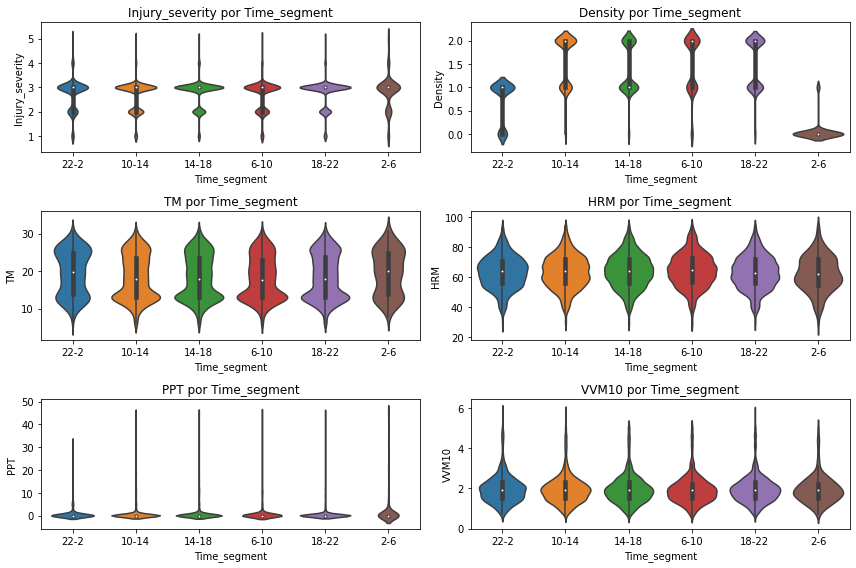

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Gráfico de violín para la distribución de 'Injury_severity' por 'Time_segment'
plt.subplot(3, 2, 1)
sns.violinplot(x='Time_segment', y='Injury_severity', data=df)
plt.title('Injury_severity por Time_segment')

# Gráfico de violín para la distribución de 'Density' por 'Time_segment'
plt.subplot(3, 2, 2)
sns.violinplot(x='Time_segment', y='Density', data=df)
plt.title('Density por Time_segment')

# Gráfico de violín para la distribución de 'TM' por 'Time_segment'
plt.subplot(3, 2, 3)
sns.violinplot(x='Time_segment', y='TM', data=df)
plt.title('TM por Time_segment')

# Gráfico de violín para la distribución de 'HRM' por 'Time_segment'
plt.subplot(3, 2, 4)
sns.violinplot(x='Time_segment', y='HRM', data=df)
plt.title('HRM por Time_segment')

# Gráfico de violín para la distribución de 'PPT' por 'Time_segment'
plt.subplot(3, 2, 5)
sns.violinplot(x='Time_segment', y='PPT', data=df)
plt.title('PPT por Time_segment')

# Gráfico de violín para la distribución de 'VVM10' por 'Time_segment'
plt.subplot(3, 2, 6)
sns.violinplot(x='Time_segment', y='VVM10', data=df)
plt.title('VVM10 por Time_segment')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


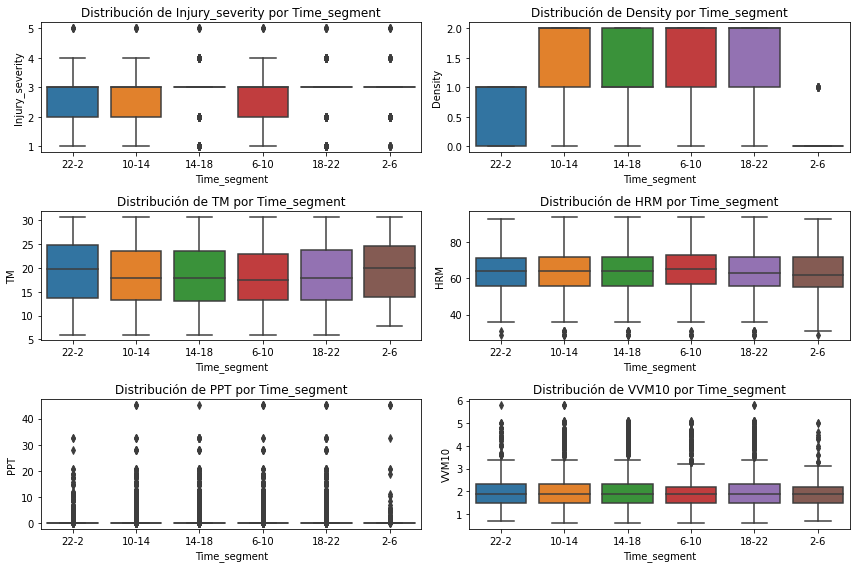

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Gráfico de cajas para la distribución de 'Injury_severity' por 'Time_segment'
plt.subplot(3, 2, 1)
sns.boxplot(x='Time_segment', y='Injury_severity', data=df)
plt.title('Distribución de Injury_severity por Time_segment')

# Gráfico de cajas para la distribución de 'Density' por 'Time_segment'
plt.subplot(3, 2, 2)
sns.boxplot(x='Time_segment', y='Density', data=df)
plt.title('Distribución de Density por Time_segment')

# Gráfico de cajas para la distribución de 'TM' por 'Time_segment'
plt.subplot(3, 2, 3)
sns.boxplot(x='Time_segment', y='TM', data=df)
plt.title('Distribución de TM por Time_segment')

# Gráfico de cajas para la distribución de 'HRM' por 'Time_segment'
plt.subplot(3, 2, 4)
sns.boxplot(x='Time_segment', y='HRM', data=df)
plt.title('Distribución de HRM por Time_segment')

# Gráfico de cajas para la distribución de 'PPT' por 'Time_segment'
plt.subplot(3, 2, 5)
sns.boxplot(x='Time_segment', y='PPT', data=df)
plt.title('Distribución de PPT por Time_segment')

# Gráfico de cajas para la distribución de 'VVM10' por 'Time_segment'
plt.subplot(3, 2, 6)
sns.boxplot(x='Time_segment', y='VVM10', data=df)
plt.title('Distribución de VVM10 por Time_segment')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [28]:
# Calcular medias y desviaciones estándar por día de la semana y segmento de tiempo
means = df.groupby(['Week_day', 'Time_segment']).mean()
stds = df.groupby(['Week_day', 'Time_segment']).std()

print("Medias por día de la semana y segmento de tiempo:")
print(means)
print("\nDesviaciones estándar por día de la semana y segmento de tiempo:")
print(stds)

# Calcular correlaciones entre las variables numéricas y 'Injury_severity'
correlations = df[['Density', 'TM', 'HRM', 'PPT', 'VVM10', 'Injury_severity']].corr()

print("\nCorrelaciones entre variables numéricas y 'Injury_severity':")
print(correlations)


Medias por día de la semana y segmento de tiempo:
                               Year  Injury_severity  Weekend Exit   Density  \
Week_day  Time_segment                                                         
Friday    10-14         2021.499069         2.666045      1.000000  1.774674   
          14-18         2021.492424         2.742424      1.000000  1.465909   
          18-22         2021.505660         2.771069      1.000000  1.773585   
          2-6           2021.611111         2.759259      1.000000  0.037037   
          22-2          2021.554054         2.736486      1.000000  0.783784   
          6-10          2021.514512         2.712401      1.000000  1.496042   
Monday    10-14         2021.506931         2.744554      0.000000  1.617822   
          14-18         2021.511364         2.775000      0.000000  1.420455   
          18-22         2021.500810         2.739060      0.000000  1.460292   
          2-6           2021.529412         2.647059      0.000000  0.

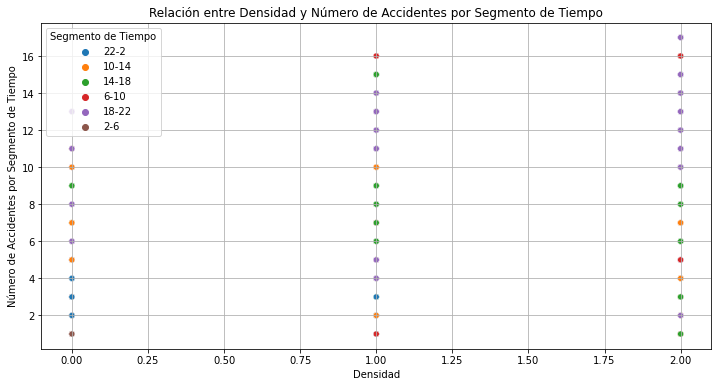

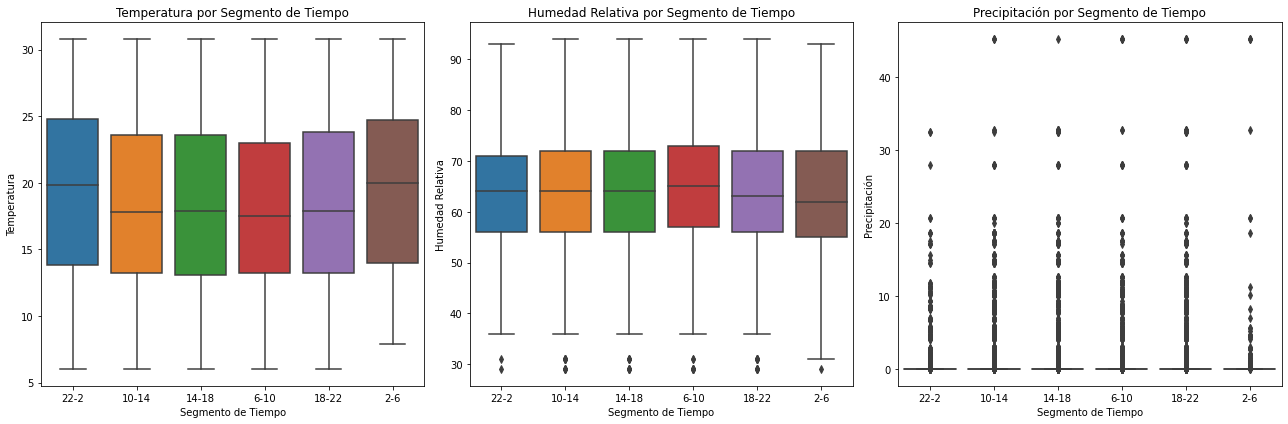

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la relación entre 'Density' y 'Number of accidents by time segment'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Density', y='Number of accidents by time segment', data=df, hue='Time_segment')
plt.title('Relación entre Densidad y Número de Accidentes por Segmento de Tiempo')
plt.xlabel('Densidad')
plt.ylabel('Número de Accidentes por Segmento de Tiempo')
plt.legend(title='Segmento de Tiempo')
plt.grid(True)
plt.show()

# Graficar la relación entre 'TM' (temperatura), 'HRM' (humedad relativa) y 'PPT' (precipitación) con el número de accidentes
plt.figure(figsize=(18, 6))

# Temperatura
plt.subplot(1, 3, 1)
sns.boxplot(x='Time_segment', y='TM', data=df)
plt.title('Temperatura por Segmento de Tiempo')
plt.xlabel('Segmento de Tiempo')
plt.ylabel('Temperatura')

# Humedad Relativa
plt.subplot(1, 3, 2)
sns.boxplot(x='Time_segment', y='HRM', data=df)
plt.title('Humedad Relativa por Segmento de Tiempo')
plt.xlabel('Segmento de Tiempo')
plt.ylabel('Humedad Relativa')

# Precipitación
plt.subplot(1, 3, 3)
sns.boxplot(x='Time_segment', y='PPT', data=df)
plt.title('Precipitación por Segmento de Tiempo')
plt.xlabel('Segmento de Tiempo')
plt.ylabel('Precipitación')

plt.tight_layout()
plt.show()



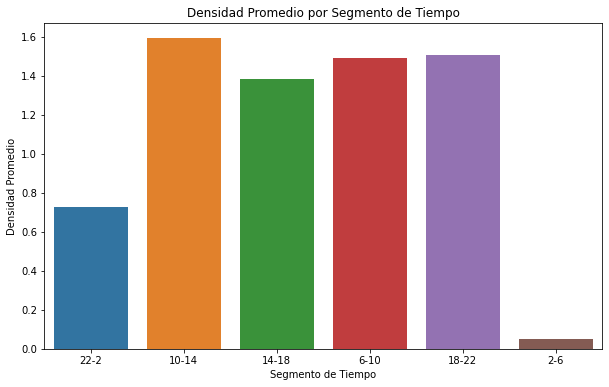

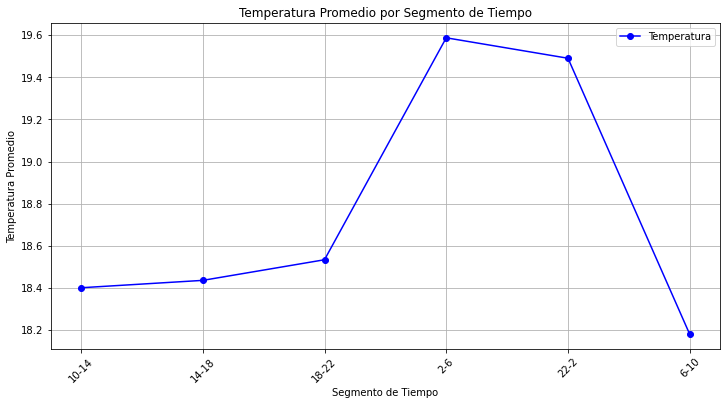

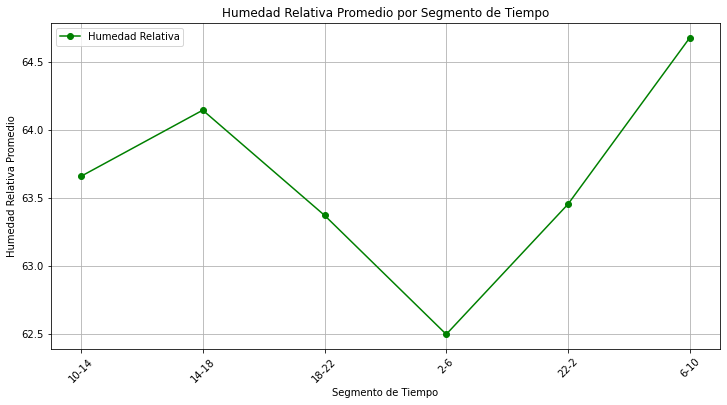

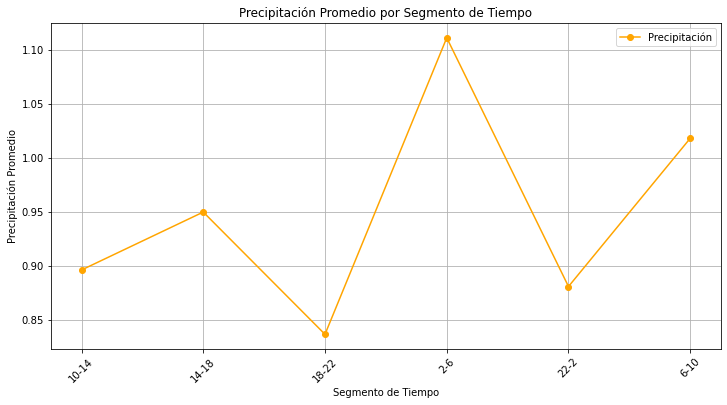

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para la densidad promedio por segmento de tiempo
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_segment', y='Density', data=df, ci=None)
plt.title('Densidad Promedio por Segmento de Tiempo')
plt.xlabel('Segmento de Tiempo')
plt.ylabel('Densidad Promedio')
plt.show()

# Gráficos de líneas para la temperatura, humedad relativa y precipitación por segmento de tiempo
plt.figure(figsize=(12, 6))

# Temperatura
plt.plot(df.groupby('Time_segment')['TM'].mean(), marker='o', label='Temperatura', color='blue')
plt.title('Temperatura Promedio por Segmento de Tiempo')
plt.xlabel('Segmento de Tiempo')
plt.ylabel('Temperatura Promedio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Humedad Relativa
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Time_segment')['HRM'].mean(), marker='o', label='Humedad Relativa', color='green')
plt.title('Humedad Relativa Promedio por Segmento de Tiempo')
plt.xlabel('Segmento de Tiempo')
plt.ylabel('Humedad Relativa Promedio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Precipitación
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Time_segment')['PPT'].mean(), marker='o', label='Precipitación', color='orange')
plt.title('Precipitación Promedio por Segmento de Tiempo')
plt.xlabel('Segmento de Tiempo')
plt.ylabel('Precipitación Promedio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


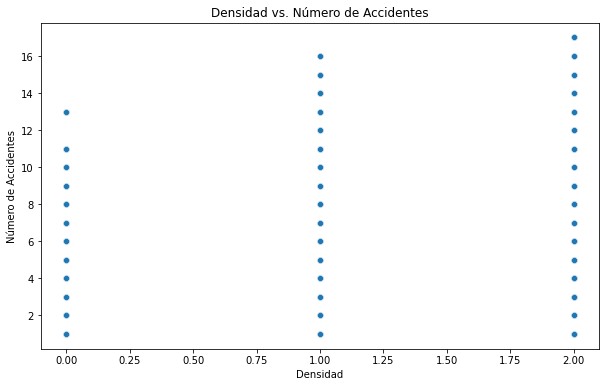

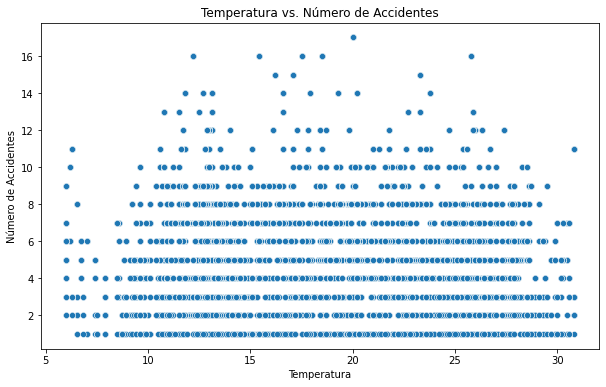

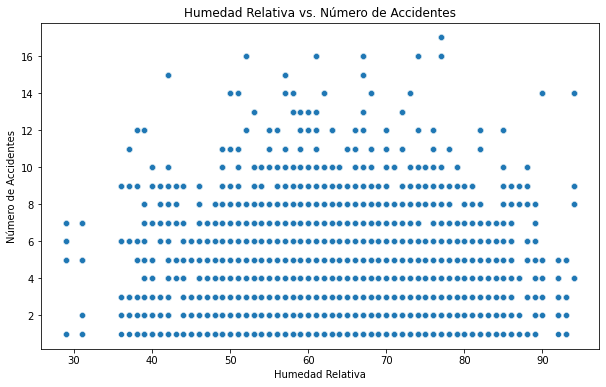

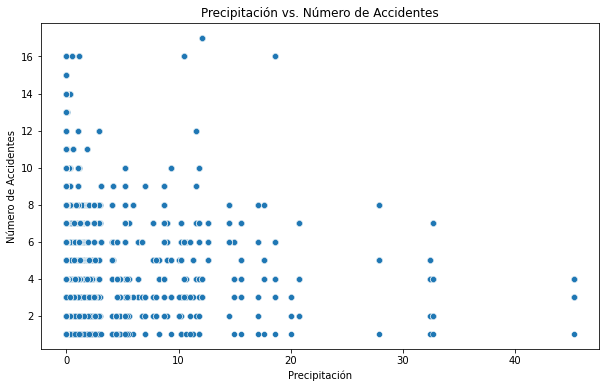

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión para la densidad vs. número de accidentes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density', y='Number of accidents by time segment', data=df)
plt.title('Densidad vs. Número de Accidentes')
plt.xlabel('Densidad')
plt.ylabel('Número de Accidentes')
plt.show()

# Gráfico de dispersión para la temperatura vs. número de accidentes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TM', y='Number of accidents by time segment', data=df)
plt.title('Temperatura vs. Número de Accidentes')
plt.xlabel('Temperatura')
plt.ylabel('Número de Accidentes')
plt.show()

# Gráfico de dispersión para la humedad relativa vs. número de accidentes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HRM', y='Number of accidents by time segment', data=df)
plt.title('Humedad Relativa vs. Número de Accidentes')
plt.xlabel('Humedad Relativa')
plt.ylabel('Número de Accidentes')
plt.show()

# Gráfico de dispersión para la precipitación vs. número de accidentes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PPT', y='Number of accidents by time segment', data=df)
plt.title('Precipitación vs. Número de Accidentes')
plt.xlabel('Precipitación')
plt.ylabel('Número de Accidentes')
plt.show()


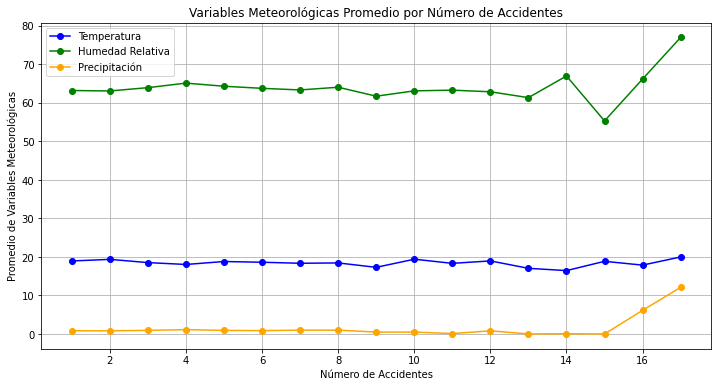

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular los promedios de las variables meteorológicas por número de accidentes
weather_means = df.groupby('Number of accidents by time segment')[['TM', 'HRM', 'PPT']].mean().reset_index()

# Gráficos de línea para mostrar el promedio de las variables meteorológicas en relación con el número de accidentes
plt.figure(figsize=(12, 6))

# Temperatura promedio por número de accidentes
plt.plot(weather_means['Number of accidents by time segment'], weather_means['TM'], marker='o', label='Temperatura', color='blue')

# Humedad relativa promedio por número de accidentes
plt.plot(weather_means['Number of accidents by time segment'], weather_means['HRM'], marker='o', label='Humedad Relativa', color='green')

# Precipitación promedio por número de accidentes
plt.plot(weather_means['Number of accidents by time segment'], weather_means['PPT'], marker='o', label='Precipitación', color='orange')

# Ajustes del gráfico
plt.title('Variables Meteorológicas Promedio por Número de Accidentes')
plt.xlabel('Número de Accidentes')
plt.ylabel('Promedio de Variables Meteorológicas')
plt.legend()
plt.grid(True)
plt.show()


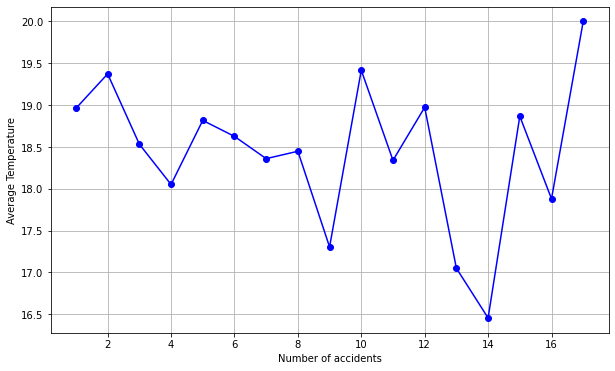

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular los promedios de las variables meteorológicas por número de accidentes
weather_means = df.groupby('Number of accidents by time segment')[['TM', 'VVM10', 'PPT', 'HRM']].mean().reset_index()

# Gráficos de línea para mostrar el promedio de la temperatura por número de accidentes
plt.figure(figsize=(10, 6))
plt.plot(weather_means['Number of accidents by time segment'], weather_means['TM'], marker='o', color='blue')
plt.xlabel('Number of accidents')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()



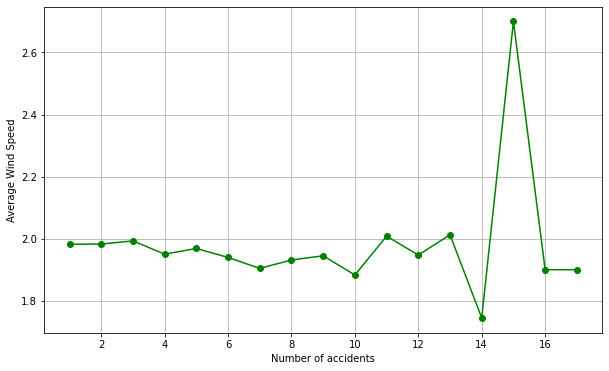

In [49]:
# Gráficos de línea para mostrar el promedio de la humedad relativa por número de accidentes
plt.figure(figsize=(10, 6))
plt.plot(weather_means['Number of accidents by time segment'], weather_means['VVM10'], marker='o', color='green')
plt.xlabel('Number of accidents')
plt.ylabel('Average Wind Speed')
plt.grid(True)
plt.show()

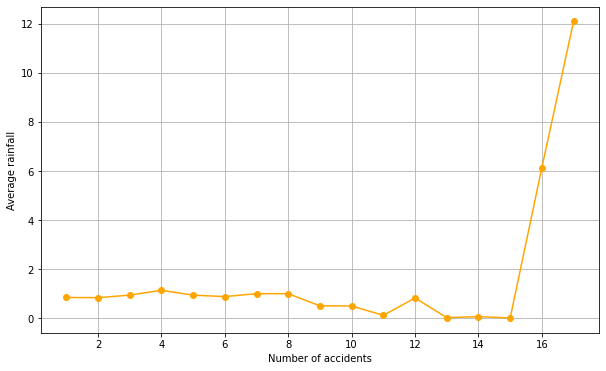

In [51]:
# Gráficos de línea para mostrar el promedio de la precipitación por número de accidentes
plt.figure(figsize=(10, 6))
plt.plot(weather_means['Number of accidents by time segment'], weather_means['PPT'], marker='o', color='orange')
plt.xlabel('Number of accidents')
plt.ylabel('Average rainfall')
plt.grid(True)
plt.show()

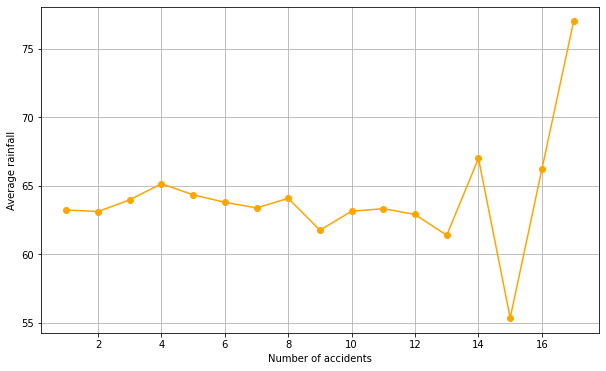

In [99]:
# Gráficos de línea para mostrar el promedio de la precipitación por número de accidentes
plt.figure(figsize=(10, 6))
plt.plot(weather_means['Number of accidents by time segment'], weather_means['HRM'], marker='o', color='orange')
plt.xlabel('Number of accidents')
plt.ylabel('Average rainfall')
plt.grid(True)
plt.show()

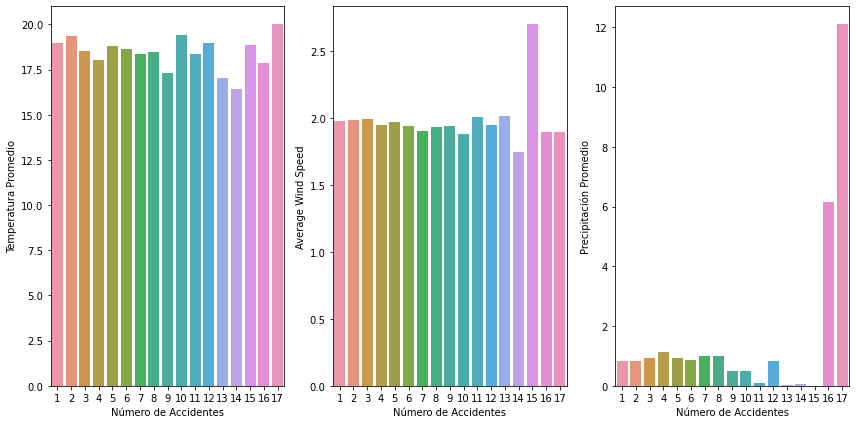

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el promedio de las variables meteorológicas por número de accidentes
weather_means = df.groupby('Number of accidents by time segment')[['TM', 'VVM10', 'PPT']].mean().reset_index()

# Gráficos de barras para mostrar el promedio de las variables meteorológicas en relación con el número de accidentes
plt.figure(figsize=(12, 6))

# Temperatura promedio por número de accidentes
plt.subplot(1, 3, 1)
sns.barplot(x='Number of accidents by time segment', y='TM', data=weather_means)

plt.xlabel('Número de Accidentes')
plt.ylabel('Temperatura Promedio')

# Humedad relativa promedio por número de accidentes
plt.subplot(1, 3, 2)
sns.barplot(x='Number of accidents by time segment', y='VVM10', data=weather_means)

plt.xlabel('Número de Accidentes')
plt.ylabel('Average Wind Speed')

# Precipitación promedio por número de accidentes
plt.subplot(1, 3, 3)
sns.barplot(x='Number of accidents by time segment', y='PPT', data=weather_means)
plt.xlabel('Número de Accidentes')
plt.ylabel('Precipitación Promedio')

plt.tight_layout()
plt.show()


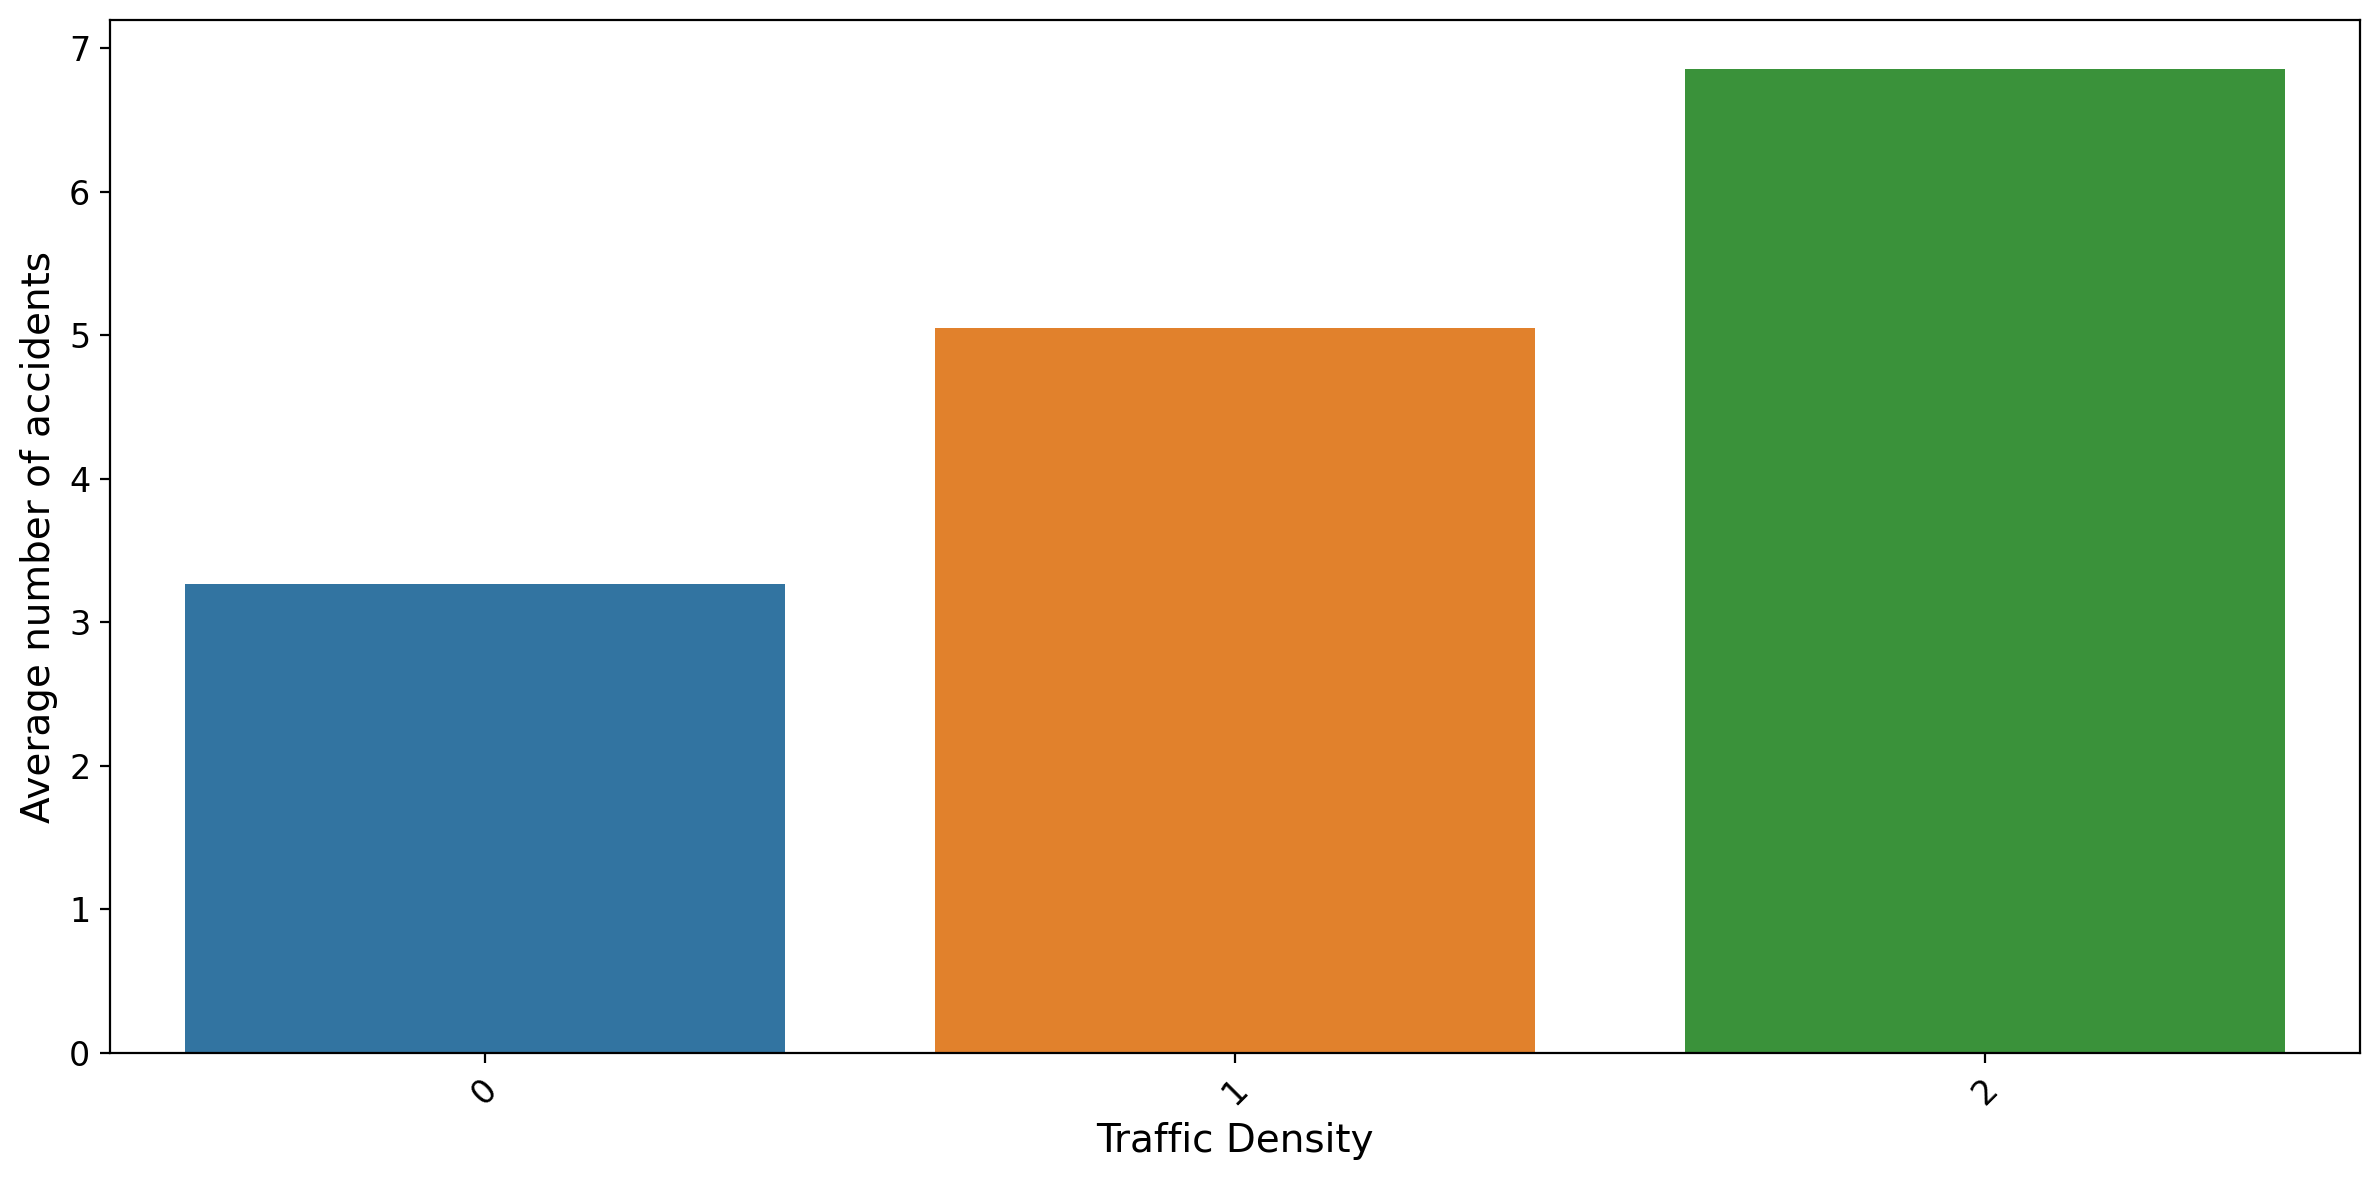

In [68]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el recuento de ocurrencias de cada valor de densidad
density_counts = df['Density'].value_counts().reset_index()
density_counts.columns = ['Density', 'Count']

# Calcular el promedio del número de accidentes para cada valor único de densidad
mean_accidents_by_density = df.groupby('Density')['Number of accidents by time segment'].mean().reset_index()

# Combinar los recuentos de densidad y los promedios de accidentes por densidad
density_data = pd.merge(density_counts, mean_accidents_by_density, on='Density')

plt.figure(figsize=(12, 6), dpi=200)  # Aumento de resolución
sns.barplot(x='Density', y='Number of accidents by time segment', data=density_data)
plt.xlabel('Traffic Density', fontsize=14)  # Aumento el tamaño del label del eje x
plt.ylabel('Average number of accidents', fontsize=14)  # Aumento el tamaño del label del eje y
plt.xticks(rotation=45, fontsize=12)  # Aumento el tamaño
plt.xticks(rotation=45, fontsize=12)  # Aumento el tamaño de las etiquetas del eje x
plt.yticks(fontsize=12)  # Aumento el tamaño de las etiquetas del eje y
plt.tight_layout()
plt.show()


In [70]:
df['Density'].value_counts()

2    6703
1    6511
0     993
Name: Density, dtype: int64

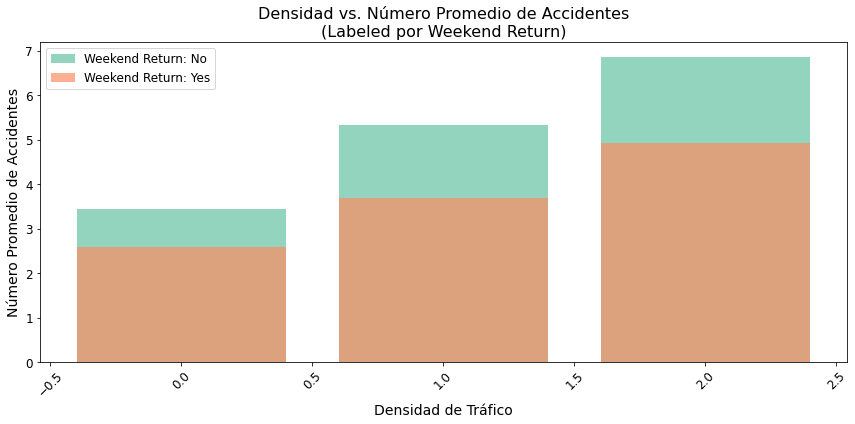

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el promedio del número de accidentes para cada valor único de densidad y combinación de 'Weekend return'
mean_accidents_density_weekend_return = df.groupby(['Density', 'Weekend Return'])['Number of accidents by time segment'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Filtrar y ordenar los datos de densidad únicos
unique_density = sorted(mean_accidents_density_weekend_return['Density'].unique())

# Colores para Weekend Return
palette = sns.color_palette("Set2", len(mean_accidents_density_weekend_return['Weekend Return'].unique()))

# Iterar sobre las combinaciones únicas de 'Weekend return'
for i, (wr) in enumerate(mean_accidents_density_weekend_return.groupby(['Weekend Return'])):
    label = f"Weekend Return: {wr[0]}"
    plt.bar(unique_density, wr[1]['Number of accidents by time segment'], label=label, color=palette[i], alpha=0.7)

# Ajustes del gráfico
plt.xlabel('Densidad de Tráfico', fontsize=14)
plt.ylabel('Número Promedio de Accidentes', fontsize=14)
plt.title('Densidad vs. Número Promedio de Accidentes\n(Labeled por Weekend Return)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



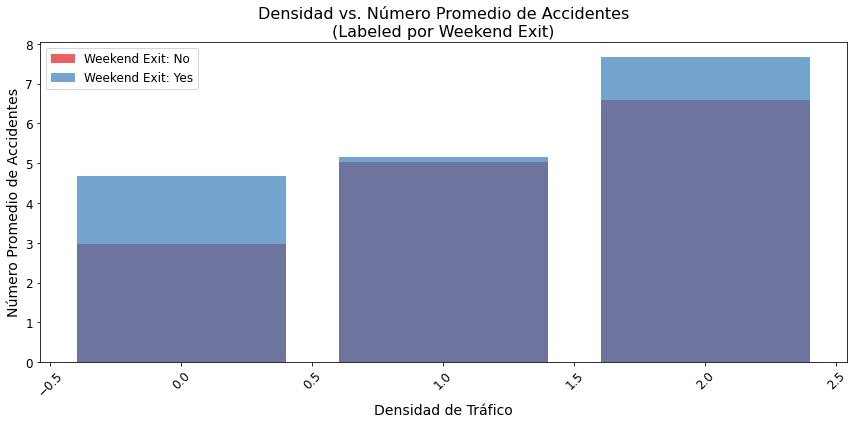

In [107]:
import matplotlib.pyplot as plt

# Calcular el promedio del número de accidentes para cada valor único de densidad y combinación de 'Weekend return'
mean_accidents_density_weekend_exit= df.groupby(['Density', 'Weekend Exit'])['Number of accidents by time segment'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Filtrar y ordenar los datos de densidad únicos
unique_density = sorted(mean_accidents_density_weekend_exit['Density'].unique())

# Colores para Weekend Exit
palette = sns.color_palette("Set1", len(mean_accidents_density_weekend_exit['Weekend Exit'].unique()))

# Iterar sobre las combinaciones únicas de 'Weekend exit'
for i, (we) in enumerate(mean_accidents_density_weekend_exit.groupby(['Weekend Exit'])):
    label = f"Weekend Exit: {we[0]}"
    plt.bar(unique_density, we[1]['Number of accidents by time segment'], label=label, color=palette[i], alpha=0.7)

# Ajustes del gráfico
plt.xlabel('Densidad de Tráfico', fontsize=14)
plt.ylabel('Número Promedio de Accidentes', fontsize=14)
plt.title('Densidad vs. Número Promedio de Accidentes\n(Labeled por Weekend Exit)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [105]:
# Reemplazar True por 'Yes' y False por 'No' en la columna 'Weekend Exit'
df['Weekend Exit'] = df['Weekend Exit'].replace({True: 'Yes', False: 'No'})

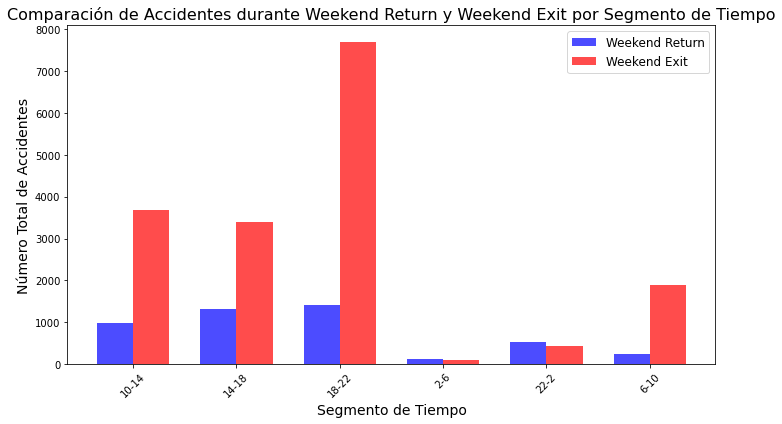

In [106]:
import matplotlib.pyplot as plt

# Calcular el número total de accidentes para cada segmento de tiempo durante el 'Weekend Return' y el 'Weekend Exit'
accidents_by_time_return = df[df['Weekend Return'] == 'Yes'].groupby('Time_segment')['Number of accidents by time segment'].sum()
accidents_by_time_exit = df[df['Weekend Exit'] == 'Yes'].groupby('Time_segment')['Number of accidents by time segment'].sum()

# Segmentos de tiempo
segments = accidents_by_time_return.index

# Número total de accidentes durante el 'Weekend Return' y 'Weekend Exit' para cada segmento de tiempo
accidents_return = accidents_by_time_return.values
accidents_exit = accidents_by_time_exit.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(segments))

plt.bar(index, accidents_return, bar_width, label='Weekend Return', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], accidents_exit, bar_width, label='Weekend Exit', color='r', alpha=0.7)

plt.xlabel('Segmento de Tiempo', fontsize=14)
plt.ylabel('Número Total de Accidentes', fontsize=14)
plt.title('Comparación de Accidentes durante Weekend Return y Weekend Exit por Segmento de Tiempo', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], segments, rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [104]:
df

,Case_number,Week_day,Year,Month,Injury_severity,Day,Holiday,Time_segment,Weekend Exit,Season,...,TM,HRM,PPT,VVM10,Severe,Slight,Dead,Weekend Return,Number of accidents by time segment,Density_range
0,2021S000001,Friday,2021,January,3.0,01/01/2021,Yes,22-2,True,Winter,...,8.9,61,0.1,1.9,1,0,0,No,1,"(0.8, 1.0]"
2,2021S000002,Friday,2021,January,2.0,01/01/2021,Yes,10-14,True,Winter,...,8.9,61,0.1,1.9,0,1,0,No,2,"(0.8, 1.0]"
7,2021S000003,Friday,2021,January,3.0,01/01/2021,Yes,14-18,True,Winter,...,8.9,61,0.1,1.9,1,0,0,No,2,"(0.8, 1.0]"
10,2021S000004,Friday,2021,January,3.0,01/01/2021,Yes,14-18,True,Winter,...,8.9,61,0.1,1.9,1,0,0,No,2,"(0.8, 1.0]"
6,2021S000005,Friday,2021,January,3.0,01/01/2021,Yes,10-14,True,Winter,...,8.9,61,0.1,1.9,1,0,0,No,2,"(0.8, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,Saturday,2022,December,2.0,31/12/2022,Yes,14-18,False,Winter,...,17.2,57,0.0,1.9,0,1,0,No,3,"(0.8, 1.0]"
17308,2022S008012,Tuesday,2022,December,3.0,06/12/2022,Yes,10-14,False,Winter,...,12.8,74,0.0,0.9,1,0,0,Yes,2,"(0.8, 1.0]"
17378,2022S008013,Saturday,2022,December,3.0,10/12/2022,Yes,22-2,False,Winter,...,12.4,56,0.3,2.6,1,0,0,No,3,"(0.8, 1.0]"
17912,2023S000004,Saturday,2022,December,2.0,31/12/2022,Yes,18-22,False,Winter,...,17.2,57,0.0,1.9,0,1,0,No,4,"(0.8, 1.0]"


In [108]:
# Calcular la media del número de accidentes por segmento de tiempo para 'Weekend Exit' Yes y No
mean_accidents_by_weekend_exit = df.groupby('Weekend Exit')['Number of accidents by time segment'].mean()

# Imprimir los resultados
print("Media de accidentes por segmento de tiempo:")
print(mean_accidents_by_weekend_exit)


Media de accidentes por segmento de tiempo:
Weekend Exit
No     5.574080
Yes    6.686503
Name: Number of accidents by time segment, dtype: float64


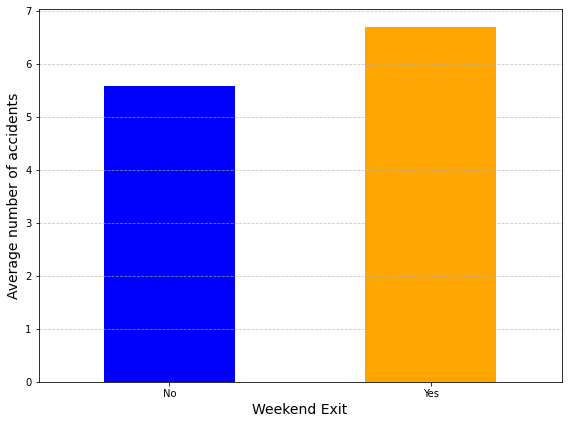

In [110]:
import matplotlib.pyplot as plt

# Calcular la media del número de accidentes por segmento de tiempo para 'Weekend Exit' Yes y No
mean_accidents_by_weekend_exit = df.groupby('Weekend Exit')['Number of accidents by time segment'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
mean_accidents_by_weekend_exit.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Weekend Exit', fontsize=14)
plt.ylabel('Average number of accidents', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


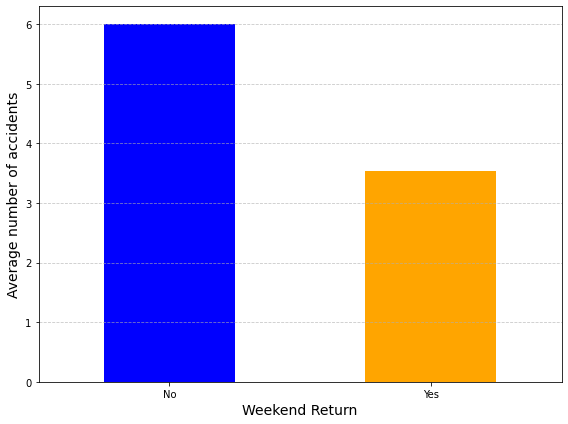

In [112]:
import matplotlib.pyplot as plt

# Calcular la media del número de accidentes por segmento de tiempo para 'Weekend Exit' Yes y No
mean_accidents_by_weekend_exit = df.groupby('Weekend Return')['Number of accidents by time segment'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
mean_accidents_by_weekend_exit.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Weekend Return', fontsize=14)
plt.ylabel('Average number of accidents', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
